In [1]:
from uncertainties import ufloat
import numpy as np

aSherpa = {'Zmumu':ufloat(1.115,0.062),'Zee':ufloat(1.149,0.063),'Ztautau':ufloat(0.977,0.2)}
aPoPy = {'Zmumu':ufloat(0.928,0.053),'Zee':ufloat(0.965,0.054),'Ztautau':ufloat(0.868,0.183)}

def delete_module(modname, paranoid=None):
    from sys import modules
    try:
        thismod = modules[modname]
    except KeyError:
        raise ValueError(modname)
    these_symbols = dir(thismod)
    if paranoid:
        try:
            paranoid[:]  # sequence support
        except:
            raise ValueError('must supply a finite list for paranoid')
        else:
            these_symbols = paranoid[:]
    del modules[modname]
    for mod in modules.values():
        try:
            delattr(mod, modname)
        except AttributeError:
            pass
        if paranoid:
            for symbol in these_symbols:
                if symbol[:2] == '__':  # ignore special symbols
                    continue
                try:
                    delattr(mod, symbol)
                except AttributeError:
                    pass

In [2]:
import sys
sys.path.append('/Users/diegomac/Documents/HEP/VBF-Analysis/MuMu/MC/backend/')
from infofile import infos

def checkString(string,requiredSubstrings,vetoedStrings):
    required = all(substring in string for substring in requiredSubstrings)
    if required:
        return not(any(substring in string for substring in vetoedStrings))
    else :
        return False

def extractXsec(infos,keyword,noKeyword):
    xSec= [infos[i]['xsec']*infos[i]['fil_eff']*infos[i]['kfac'] for i in infos if checkString(i,keyword,noKeyword)] 
    print(xSec)
    xSecCorrected = []
    for i in xSec:
        if i not in xSecCorrected:
            xSecCorrected.append(i)
    print(len(xSecCorrected))
    return sum(xSecCorrected)
    
xSecSherpa ={'Zmumu':0.0,'Zee':0.0,'Ztautau':0.0}    
xSecPoPy ={'Zmumu':0.0,'Zee':0.0,'Ztautau':0.0}    

xSecSherpa['Zmumu'] = extractXsec(infos,['Zmumu_sherpa','2018','VBF'],['old'])
xSecPoPy['Zmumu'] = extractXsec(infos,['Zmumu_','2018','VBF'],['sherpa','old'])

print(len(infos))

delete_module('infofile')

sys.path.remove('/Users/diegomac/Documents/HEP/VBF-Analysis/MuMu/MC/backend/')

sys.path.append('/Users/diegomac/Documents/HEP/VBF-Analysis/Zee/MC/backend/')
from infofile import infos as infoss

print(len(infoss))

xSecSherpa['Zee'] = extractXsec(infoss,['Zee_sherpa','2018','VBF'],['old'])
xSecPoPy['Zee'] = extractXsec(infoss,['Zee_','2018','VBF'],['sherpa','old'])

delete_module('infofile')

sys.path.remove('/Users/diegomac/Documents/HEP/VBF-Analysis/Zee/MC/backend/')

sys.path.append('/Users/diegomac/Documents/HEP/VBF-Analysis/TauMu/MC/backend/')
from infofile import infos

print(len(infos))

xSecSherpa['Ztautau'] = extractXsec(infos,['Ztautau_sherpa','2018','VBF'],['old'])
xSecPoPy['Ztautau'] = extractXsec(infos,['Ztautau_','2018','VBF'],['sherpa','old'])

[0.77949, 0.77949, 0.77949, 0.77949]
1
[0.64977, 0.64977, 0.64977, 0.64977, 0.64977]
1
883
858
[0.77943, 0.77943, 0.77943]
1
[0.64977, 0.64977, 0.64977, 0.64977]
1
776
[0.77916, 0.77916]
1
[0.64977]
1


In [3]:
print(xSecPoPy,xSecSherpa)

{'Zmumu': 0.64977, 'Zee': 0.64977, 'Ztautau': 0.64977} {'Zmumu': 0.77949, 'Zee': 0.77943, 'Ztautau': 0.77916}


In [4]:
for i in aSherpa:
    aSherpa[i] = aSherpa[i]*xSecSherpa[i]

for i in aPoPy:
    aPoPy[i] = aPoPy[i]*xSecPoPy[i]
    
def weightedAverage(value1,value2):
    inverseStdDev = 1/(value1.std_dev)**2 + 1/(value2.std_dev)**2
    average = (value1.nominal_value/(value1.std_dev)**2 + value2.nominal_value/(value2.std_dev)**2)/inverseStdDev
    return ufloat(average,np.sqrt(1/inverseStdDev))

average = {}
for i in aSherpa:
    average[i] = weightedAverage(aSherpa[i],aPoPy[i])

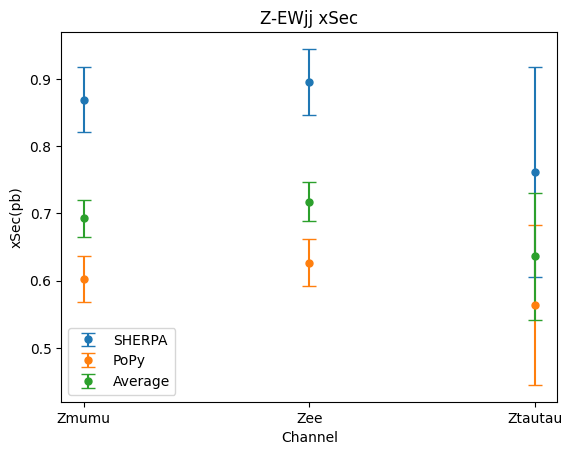

In [5]:
import matplotlib.pyplot as plt

# define the categories for the x-axis
categories = ['Zmumu', 'Zee','Ztautau']

# define the data for the y-axis
sherpa = [aSherpa['Zmumu'].nominal_value, aSherpa['Zee'].nominal_value,aSherpa['Ztautau'].nominal_value]  # the mean value for each category
sherpaErrors = [aSherpa['Zmumu'].std_dev, aSherpa['Zee'].std_dev,aSherpa['Ztautau'].std_dev]  # the standard deviation for each category

PoPy = [aPoPy['Zmumu'].nominal_value, aPoPy['Zee'].nominal_value,aPoPy['Ztautau'].nominal_value]  # the mean value for each category
PoPyErrors = [aPoPy['Zmumu'].std_dev, aPoPy['Zee'].std_dev,aPoPy['Ztautau'].std_dev]  # the standard deviation for each category

averageValue = [average['Zmumu'].nominal_value, average['Zee'].nominal_value,average['Ztautau'].nominal_value]  # the mean value for each category
averageErrors = [average['Zmumu'].std_dev, average['Zee'].std_dev,average['Ztautau'].std_dev]  # the standard deviation for each category


# create a figure and axes object
fig, ax = plt.subplots()

# plot the means as points and the errors as error bars
ax.errorbar(categories, sherpa, yerr=sherpaErrors, fmt='o', capsize=5, capthick=1, markersize=5)
ax.errorbar(categories, PoPy, yerr=PoPyErrors, fmt='o', capsize=5, capthick=1, markersize=5)

ax.errorbar(categories, averageValue, yerr=averageErrors, fmt='o', capsize=5, capthick=1, markersize=5)

# set the title and axis labels
ax.set_title('Z-EWjj xSec')
ax.set_xlabel('Channel')
ax.set_ylabel('xSec(pb)')

plt.legend(['SHERPA','PoPy', 'Average'])

# display the plot
plt.show()

In [21]:
(0.725-0.56)/0.725

0.22758620689655162